# Projection

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)  
This work by Jephian Lin is licensed under a [Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Main idea

The **projection** of a vector ${\bf b}$ onto the column space of $A$ is  
$$A(A^\top A)^{-1}A^\top {\bf b}.$$

## Side stories

- nearest solution
- shortest solution
- regression

## Experiments

###### Exercise 1
Let  
```python
A = np.array([[1,1], 
              [-1,0], 
              [0,-1]])
b = np.array([1,0,0])
```

###### 1(a)
Find the projection of ${\bf b}$ onto the column space of $A$.  
Compare your answer to L3Q5.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

A = np.array([[1,1], 
              [-1,0], 
              [0,-1]])
b = np.array([1,0,0])
AT = A.T
ATAinv = np.linalg.inv(AT.dot(A))
A.dot(ATAinv).dot(AT).dot(b)

array([ 0.66666667, -0.33333333, -0.33333333])

###### 1(b)
Draw the grid using the columns of $A$.  
Draw a vector in blue for ${\bf b}$.  
Draw a vector in red for its projection.  
Does the red vector lies on the grid?  
Draw a vector in green from the head of the red vector to the head of the blue vector.  
Is the green vector orthogonal to the grid?  

<IPython.core.display.Javascript object>


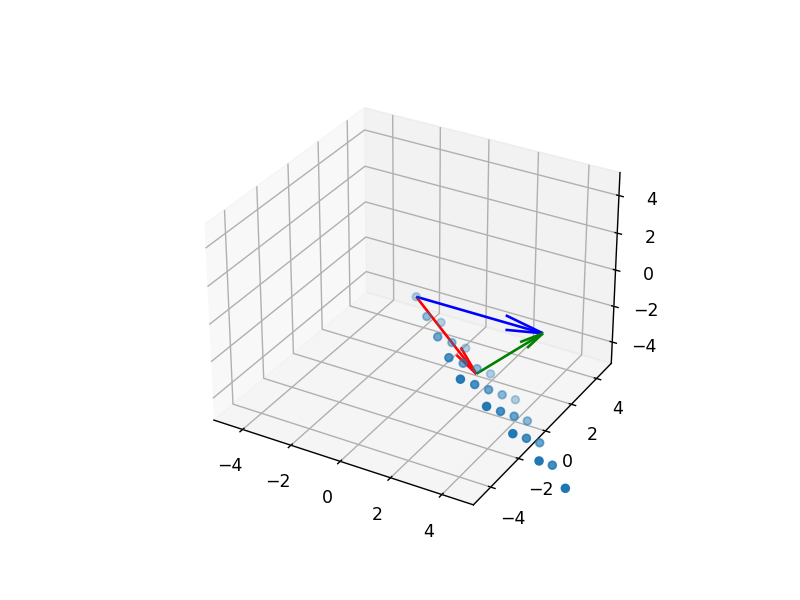

In [3]:
%matplotlib notebook
#inline
#fig = plt.figure()
ax = plt.axes(projection='3d')

grid = np.meshgrid(np.arange(5),np.arange(5))
xs = grid[0].ravel()
ys = grid[1].ravel()

vs = np.vstack([xs,ys])
Avs = A.dot(vs)

ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ax.scatter(Avs[0],Avs[1],Avs[2])

proj = A.dot(ATAinv).dot(AT).dot(b)
new = b - proj

ax.quiver(0,0,0,5*1,0,0,color='blue')
ax.quiver(0,0,0,5*proj[0],5*proj[1],5*proj[2],color='red')
ax.quiver(5*proj[0],5*proj[1],5*proj[2],5*new[0],5*new[1],5*new[2],color='green')


###### 1(c)
It looks like the equation $A{\bf x} = {\bf b}$ is inconsistent (and has no solution).  
Find ${\bf x}$ such that $\|A{\bf x} - {\bf b}\|$ is minimized.

In [4]:
x = ATAinv.dot(AT).dot(b)
x

array([0.33333333, 0.33333333])

## Exercises

###### Exercise 2
Let  
```python
x = np.array([1,2,3])
y = np.array([1.1,1.9,3.1])
A = np.vstack([np.ones_like(x), x]).T
```

###### 2(a)
Find ${\bf c}$ such that $\|A{\bf c} - {\bf y}\|$ is minimized.

In [5]:
x = np.array([1,2,3])
y = np.array([1.1,1.9,3.1])
A = np.vstack([np.ones_like(x), x]).T
c = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
c

array([0.03333333, 1.        ])

###### 2(b)
Let $f(x) = 1.5 + 0.5 x$.  
Find a vector ${\bf v}\in\mathbb{R}^2$ such that 
$$A{\bf c} = \begin{bmatrix} f(1) \\ f(2) \\ f(3) \end{bmatrix}.$$

In [6]:
v = np.array([[1.5],[0.5]])
A.dot(v)

array([[2. ],
       [2.5],
       [3. ]])

###### 2(c)
Let $f(x) = c_0 + c_1x$.  
Find the coefficients $c_0$ and $c_1$ such that  
$$\sum_{i=0}^2 (f(x_i) - y_i)^2$$
is minimized.

In [7]:
minfcn = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
c0 = minfcn[0]
c1 = minfcn[1]
print(c0)
print(c1)

0.0333333333333341
1.0


###### 2(d)
Plot the points $(x_i,y_i)$ in blue.  
Plot the points $(x_i,f(x_i))$ in red, where $f(x)$ is the one you found in 2(c).  

<IPython.core.display.Javascript object>


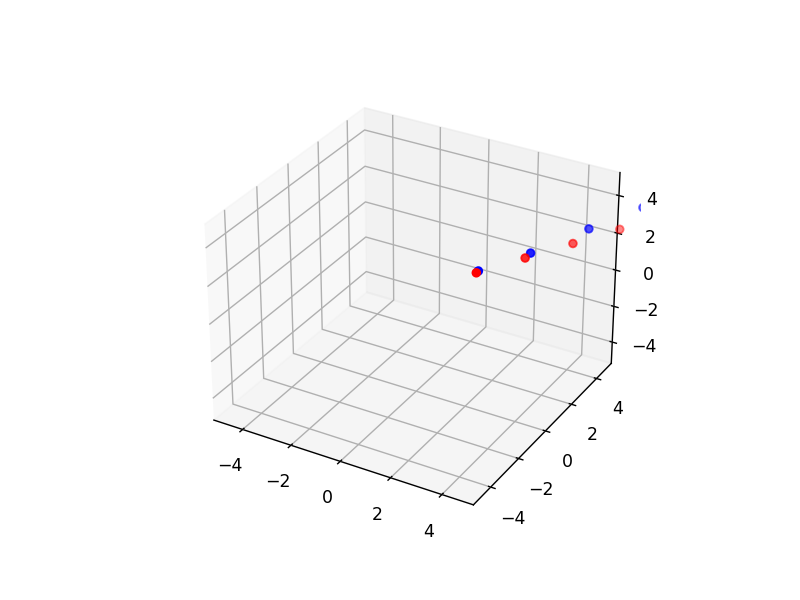

array([[ 1. ,  2. ,  3. ,  4. ,  5. ],
       [ 2.7,  4.8,  7.5, 10. , 13.1]])

In [16]:
fxi = c0*np.ones_like(x)+c1*x

%matplotlib notebook
ax = plt.axes(projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ax.scatter(*np.vstack([x, y]), color='blue')
ax.scatter(*np.vstack([x, fxi]), color='red')




###### Exercise 3
Let  
```python
x = np.array([1,2,3,4,5])
y = np.array([2.7,4.8,7.5,10,13.1])
A = np.vstack([np.ones_like(x), x, x**2]).T
```

###### 3(a)
Find ${\bf c}$ such that $\|A{\bf c} - {\bf y}\|$ is minimized.

In [9]:
x = np.array([1,2,3,4,5])
y = np.array([2.7,4.8,7.5,10,13.1])
A = np.vstack([np.ones_like(x), x, x**2]).T
c = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
c


array([0.72      , 1.82857143, 0.12857143])

###### 3(b)
Let $f(x) = 0.5 + 2 x + 0.1x^2$.  
Find a vector ${\bf v}\in\mathbb{R}^3$ such that 
$$A{\bf c} = \begin{bmatrix} f(1) \\ f(2) \\ f(3) \\ f(4) \\ f(5) \end{bmatrix}.$$

In [10]:
v = np.array([[0.5],[2],[0.1]])
A.dot(v)

array([[ 2.6],
       [ 4.9],
       [ 7.4],
       [10.1],
       [13. ]])

###### 3(c)
Let $f(x) = c_0 + c_1x + c_2x^2$.  
Find the coefficients $c_0,c_1,c_2$ such that  
$$\sum_{i=0}^2 (f(x_i) - y_i)^2$$
is minimized.

In [11]:
minfcn = np.linalg.inv(A.T.dot(A)).dot(A.T).dot(y)
c0 = minfcn[0]
c1 = minfcn[1]
c2 = minfcn[2]
print(c0)
print(c1)
print(c2)

0.7200000000001081
1.8285714285714052
0.12857142857143156


###### 3(d)
Plot the points $(x_i,y_i)$ in blue.  
Plot the points $(x_i,f(x_i))$ in red, where $f(x)$ is the one you found in 3(c).  

<IPython.core.display.Javascript object>


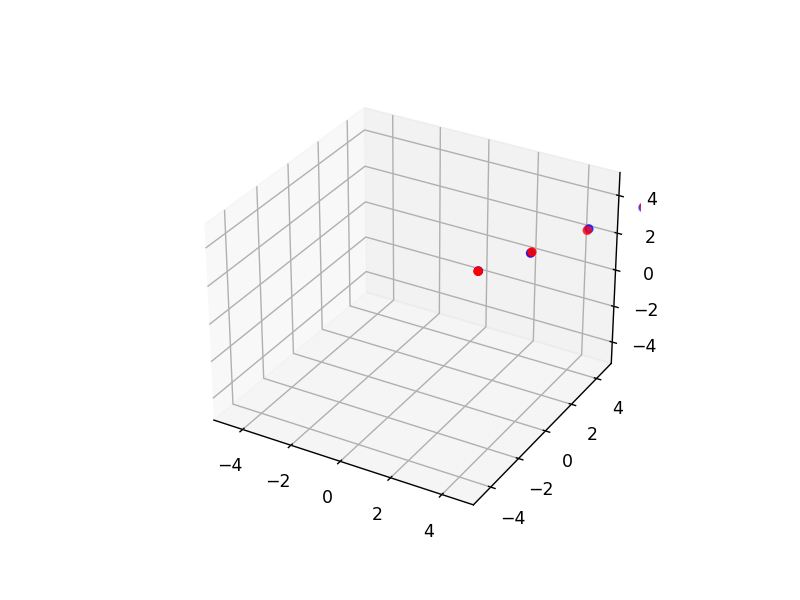

In [12]:
fxi = c0*np.ones_like(x)+c1*x+c2*np.square(x)

%matplotlib notebook
ax = plt.axes(projection='3d')
ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-5,5)
ax.scatter(*np.vstack([x, y]), color='blue')
ax.scatter(*np.vstack([x, fxi]), color='red')



##### Exercise 4
Let  
```python
u = np.array([1,1])
```

###### 4(a)
Find the projection matrix $P$ such that $P{\bf x}$ is the projection of ${\bf x}$ onto the line spanned by ${\bf u}$.  
Can you find a formula of $P$ by ${\bf u}$?

In [13]:
u = np.array([1,1]).reshape(2,1)
ut = u.T
utinv = 1/u.T.dot(u)
P = u.dot(utinv).dot(ut)
P



array([[0.5, 0.5],
       [0.5, 0.5]])

###### 4(b)
Let  
```python
u_hat = u / np.linalg.norm(u)
```
be a vector of length 1.  
Check if the $P$ for $\hat{\bf u}$ is the same as the $P$ for ${\bf u}$.  
Can you find a formula of $P$ by $\hat{\bf u}$?

In [14]:
u_hat = (u / np.linalg.norm(u) ).reshape(2,1)

p = u_hat.dot(1/u_hat.T.dot(u_hat)).dot(u_hat.T)
p==P

array([[ True,  True],
       [ True,  True]])

#### Remark
Think about the reasons behind the main idea.  
1. One may write ${\bf b} = {\bf p} + {\bf h}$ such that ${\bf p}\in\operatorname{Col}(A)$ and ${\bf h}\perp\operatorname{Col}(A)$.  This means the following:  
    - ${\bf p} = A{\bf x}$ for some ${\bf x}$
    - $A^\top {\bf h} = {\bf 0}$
2. Then $A^\top {\bf b} = A^\top{\bf p} = A^\top A{\bf x}$ for some ${\bf x}$.
3. $(A^\top A)^{-1}A^\top{\bf b} = {\bf x}$
4. $A(A^\top A)^{-1}A^\top{\bf b} = A{\bf x} = {\bf p}$ is the projection.